In [6]:
import os
import pandas as pd
import numpy as np
import seaborn as sns

In [45]:
evaluation_dir = "/home/luisasantus/Desktop/crg_cluster/projects/structural_regression/results/"
summary = os.path.join("/home/luisasantus/Desktop/crg_cluster/data/structural_regression/stats/", "02_summary_homfam_with_refs.csv")
# Load family summary
family_summary = pd.read_csv(summary)
family_summary = family_summary.rename(columns = { "familcombined": "family"})

In [25]:
# Parse similarity files 
sims_file = os.path.join(evaluation_dir,"/homfam/sim/homfam_similarities_summary.csv")
sims = pd.read_csv(sims, header = None)
sims = sims.drop(6,axis = 1)
sims.columns = ["family", "dataset", "tot", "avg", "var", "std"]

In [48]:
summary = family_summary.merge(sims, on = "family")
summary = summary[["family", "n_sequences_ref", "n_sequences_combined", "tot", "avg", "var", "std"]]

In [69]:
summary

,family,n_sequences_ref,n_sequences_combined,tot,avg,var,std
0,Stap_Strp_toxin,6,640.0,13.88,13.88,338.39,18.40
1,sodfe,8,4455.0,18.35,18.35,304.40,17.45
2,ghf5,6,2717.0,6.51,6.51,45.23,6.73
3,cys,13,4316.0,11.42,11.42,107.24,10.36
4,hla,5,13465.0,22.90,22.90,931.96,30.53
...,...,...,...,...,...,...,...
85,mofe,6,2567.0,9.54,9.54,108.24,10.40
86,KAS,6,2070.0,16.11,16.11,629.45,25.09
87,rub,5,1435.0,40.10,40.10,360.67,18.99
88,hormone_rec,5,3509.0,7.43,7.43,39.51,6.29


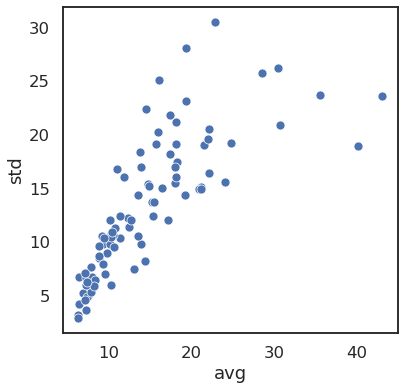

In [111]:
f, ax = plt.subplots(1, 1, figsize=(6, 6), sharex=True)
ax = sns.scatterplot(data = summary, x = "avg", y = "std" )
#ax.set(xlabel = "similarity", ylabel = "# of sequences")

In [72]:
# Explore similarity scores on one family

In [105]:
file = "/home/luisasantus/Desktop/crg_cluster/projects/structural_regression/results/homfam/similarity/homfam/bowman.sim_all"
sim = pd.read_csv(file,header = None)
sim = sim.transpose()
sim = sim.dropna()

In [106]:
sim_summary = sim[sim[0].str.contains(":")][0].str.split(":",expand = True)
sim_summary.columns = ["id", "similarity"]
sim_summary.similarity = sim_summary.similarity.astype(float)

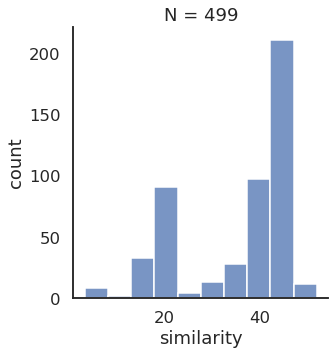

In [110]:
ax = sns.displot(sim_summary, x = "similarity")
title = "N = "+str(len(sim_summary))
ax.set( title = title, ylabel = "count")

In [116]:
# Load scores 
stats_dir = "/home/luisasantus/Desktop/crg_cluster/data/structural_regression/stats/"
scores_file = os.path.join(stats_dir, "03_scores_df.csv") 

In [131]:
scores = pd.read_csv(scores_file)

# -------------------------
#      Progressive
# -------------------------
progressive_scores = scores[scores.name.str.contains("progressive")]
progressive_scores[["family", "method", "align_method", "tree_method"]] = progressive_scores.name.str.split(".", expand = True)
progressive_scores["benchmarking_dataset"] = "homfam"
progressive_scores= progressive_scores[progressive_scores.tree_method == "MBED"]
# -------------------------
#      Dyanmic
# -------------------------
dynamic_scores = scores[scores.name.str.contains("dynamic")]
dynamic_scores[["family", "method", "bucket_size", "dynamicX_label","dynamicX_val","master_msa", "slave_msa", "tree_method"]] = dynamic_scores.name.str.split(".", expand = True)
dynamic_scores = dynamic_scores[dynamic_scores.tree_method == "MBED"]

scores_df = pd.concat([progressive_scores, dynamic_scores], ignore_index=True, sort=False)

df_d_r = pd.merge(dynamic_scores, progressive_scores, on = ["family"],suffixes=('_3D', '_SEQ') )
df_d_r["diff_sp"] = df_d_r.sp_3D - df_d_r.sp_SEQ / abs(df_d_r.sp_SEQ * 100)
df_scores_summary = df_d_r[["family", "sp_3D", "sp_SEQ"]]

/tmp/ipykernel_83858/1182853648.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  progressive_scores[["family", "method", "align_method", "tree_method"]] = progressive_scores.name.str.split(".", expand = True)
/tmp/ipykernel_83858/1182853648.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  progressive_scores["benchmarking_dataset"] = "homfam"
/tmp/ipykernel_83858/1182853648.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_

In [138]:
sim_summary

,id,similarity
0,A0JKC9_9FABA/56-81,45.77
1,C5Y7Y4_SORBI/31-57,15.40
2,Q84X87_DOLBI/72-96,43.33
3,Q39806_SOYBN/4-28,41.52
4,B2RG94_9FABA/83-107,44.92
...,...,...
494,Q8VX21_PEA/76-100,41.77
495,Q8W4Y2_LENCU/76-100,40.94
496,B8QYA9_ZEAMP/70-99,18.59
497,A0JKC2_9FABA/83-107,44.84


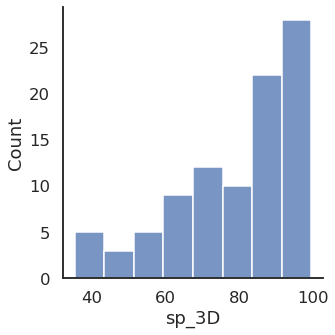

In [141]:
sns.displot(df_scores_summary, x = "sp_3D")